In [1]:
#데이터 구성 패키지 : 시리즈, 데이터 프레임
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
rc("font",family = "NanumGothic")

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

#ANOVA 분석 패키지
from statsmodels.stats.anova import anova_lm

#가설검정 및 통계 분석 패키지 - 회귀분석
from statsmodels.formula.api import ols
#qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
#선형모델 formula
import statsmodels.formula.api as smf
#평가함수
from statsmodels.tools.eval_measures import rmse
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#학습용/평가용 데이터 분리 : train, test
from sklearn.model_selection import train_test_split
#선형회귀모형
from sklearn.linear_model import LinearRegression
#변수선택법(후진제거법)
from sklearn.feature_selection import RFE
#scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
#평가함수
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score
#예측/회귀
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor
#최적모델, 파라미터 검색
from sklearn.model_selection import GridSearchCV
#graphiz: 나무 구조 시각화(dot. 확장자 파일 불러오기 등)
import graphviz
import mglearn
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#주성분 분석
from sklearn.decomposition import PCA
#회귀분석
import statsmodels.api as sm 
#자기상관 함수, 부분자기상관 함수
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ARIMA
from statsmodels.tsa.arima_model import ARIMA
#로지스틱 회귀
from statsmodels.api import Logit
#분류모델 평가함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor
#로지스틱 회귀
from statsmodels.api import Logit
#분류모델 평가함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
#분류 decision tree
from sklearn.tree import DecisionTreeClassifier
#분류 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
#분류 SVM
from sklearn.svm import SVC
#분류 NN(MLPClassifier)
from sklearn.neural_network import MLPClassifier
#분류 knn
from sklearn.neighbors import KNeighborsClassifier

from datetime import datetime
import os
from fbprophet import Prophet 
from matplotlib import pyplot

In [3]:
df1 = pd.read_csv('/home/piai/바탕화면/간편식 데이터/정제완료된_booking_+_productname_추가한파일_csv')
df1.head()

,Unnamed: 0,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,납기지연여부,ym,품목명,납기일-수주일
0,608060,C,20160908,246,IJ2120,400,1BA03023,720,720,2600.0,1872000.0,187200,Y,20190912,0,201609,갈릭라이스3kg,30004
1,303029,C,20161230,279,IJ9471,400,1BA03147,0,0,1705.0,1705.0,171,Y,20171231,0,201612,요리밥부드러운새우볶음밥250g,10001
2,303032,C,20161230,282,IJ9471,400,1BA03151,0,0,1841.0,1841.0,184,Y,20171231,0,201612,요리밥상하이필라프250g,10001
3,667395,C,20181230,289,IO976,400,13R11033,280,1,8400.0,4200.0,420,Y,20191231,0,201812,빠네스테이크소스T,10001
4,303031,C,20161230,281,IJ9471,400,1BA03149,0,0,1500.0,1500.0,150,Y,20171231,0,201612,기타,10001


In [4]:
df_cook = df1[df1['품목명'].str.contains('볶음', case=False, regex=False)]
df_cook

,Unnamed: 0,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,납기지연여부,ym,품목명,납기일-수주일
1,303029,C,20161230,279,IJ9471,400,1BA03147,0,0,1705.0,1705.0,171,Y,20171231,0,201612,요리밥부드러운새우볶음밥250g,10001
5,303030,C,20161230,280,IJ9471,400,1BA03148,0,0,1705.0,1705.0,171,Y,20171231,0,201612,요리밥열을뿜는낙지볶음밥250g,10001
10,230230,C,20160710,248,IJ9780,400,1BA03147,0,40,1591.0,254560.0,25456,Y,20170710,1,201607,요리밥부드러운새우볶음밥250g,10000
11,230229,C,20160710,247,IJ9780,400,1BA03148,0,15,1591.0,95460.0,9546,Y,20170710,1,201607,요리밥열을뿜는낙지볶음밥250g,10000
14,303047,C,20161231,134,IK0084,400,1BA03088,46,46,2291.0,219936.0,21994,Y,20171231,0,201612,1974새우볶음밥240g,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963190,270993,C,20171018,412,IJ9403,400,13A00740,10,10,1324.0,47664.0,4766,Y,20171018,0,201710,닭볶음탕양념(홈플),0
963197,271000,C,20171018,404,IJ9403,400,1BA03210,427,427,5850.0,2480400.0,248040,Y,20171018,0,201710,"AAF불곱창깍두기볶음밥(밥,김가루)*",0
963216,270989,C,20171018,403,IJ9403,400,1BA03209,63,63,5850.0,327600.0,32760,Y,20171018,0,201710,AAF장조림볶음밥*,0
963236,270985,C,20171018,399,IK0305,400,1BA03089,13,13,2291.0,61857.0,6186,Y,20171018,0,201710,1974양송이버섯볶음밥240g,0


In [7]:
df_cook = df_cook[df_cook['품목명'].str.contains('밥', case=False, regex=False)]
df_cook

,Unnamed: 0,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,납기지연여부,ym,품목명,납기일-수주일
1,303029,C,20161230,279,IJ9471,400,1BA03147,0,0,1705.0,1705.0,171,Y,20171231,0,201612,요리밥부드러운새우볶음밥250g,10001
5,303030,C,20161230,280,IJ9471,400,1BA03148,0,0,1705.0,1705.0,171,Y,20171231,0,201612,요리밥열을뿜는낙지볶음밥250g,10001
10,230230,C,20160710,248,IJ9780,400,1BA03147,0,40,1591.0,254560.0,25456,Y,20170710,1,201607,요리밥부드러운새우볶음밥250g,10000
11,230229,C,20160710,247,IJ9780,400,1BA03148,0,15,1591.0,95460.0,9546,Y,20170710,1,201607,요리밥열을뿜는낙지볶음밥250g,10000
14,303047,C,20161231,134,IK0084,400,1BA03088,46,46,2291.0,219936.0,21994,Y,20171231,0,201612,1974새우볶음밥240g,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963175,861699,C,20210110,76,IJ9451,202,1BA03049,420,420,10200.0,1428000.0,142800,Y,20210110,0,202101,김치볶음밥-S,0
963197,271000,C,20171018,404,IJ9403,400,1BA03210,427,427,5850.0,2480400.0,248040,Y,20171018,0,201710,"AAF불곱창깍두기볶음밥(밥,김가루)*",0
963216,270989,C,20171018,403,IJ9403,400,1BA03209,63,63,5850.0,327600.0,32760,Y,20171018,0,201710,AAF장조림볶음밥*,0
963236,270985,C,20171018,399,IK0305,400,1BA03089,13,13,2291.0,61857.0,6186,Y,20171018,0,201710,1974양송이버섯볶음밥240g,0


In [8]:
df_cook['품목명'].unique()

array(['요리밥부드러운새우볶음밥250g', '요리밥열을뿜는낙지볶음밥250g', '1974새우볶음밥240g',
       '1974양송이버섯볶음밥240g', '소불고기볶음밥300g', '철판직화볶음밥', '중화풍볶음밥-C',
       '홍익돈까스 야채볶음밥', '타이풍볶음밥E', 'CJ새우볶음밥(에쓰닉)', 'CJ깍두기볶음밥(에쓰닉)',
       '게살볶음밥E', '더맛있는새우볶음밥230g*2ea', '야채볶음밥베이스3kg', 'NEW야채볶음밥베이스3kg',
       'NEW새우볶음밥300g', 'NEW소불고기볶음밥300g', '찰현미새우볶음밥5kg', '새우볶음밥300g',
       '시아스야채볶음밥3kg', '감자탕볶음밥', 'NEW햄야채볶음밥300g', 'NEW낙지볶음밥300g',
       '탄두리닭가슴살현미볶음밥1kg', 'NEW해물볶음밥300g', 'NEW게살볶음밥300g', '오삼불고기볶음밥(시아스)',
       'NEW김치볶음밥300g', '땡초상하이볶음밥', '해물볶음밥300g', '햄야채볶음밥-S 200g',
       '오늘은!새우볶음밥', '비비고닭가슴살볶음밥(홈플)', 'NEW치킨데리야끼볶음밥300g', '비비고새우볶음밥(홈플)',
       '치킨데리야끼볶음밥-S 200g', '옥수수볶음밥JB 1kg', '비비고깍두기볶음밥(김,참깨와고명)',
       'CJ새우볶음밥/20개입', '새우볶음밥-S 200g', '쉐프솔루션베이스볶음밥(시즌)500g',
       '비비고닭가슴살볶음밥420g', '비비고새우볶음밥420g', 'CJ새우볶음밥3kg', '햄야채볶음밥300g',
       '치킨데리야끼볶음밥300g', 'CJ새우볶음밥*5ea', 'CJ해물볶음밥*5ea', '낙지볶음밥300g',
       '김치볶음밥300g', '게살볶음밥300g', '퀴노아렌틸콩현미볶음밥5kg', '김치볶음밥-S',
       '하남돼지집김치볶음밥', '짬뽕볶음밥(시아스)', '부드러운새우볶음밥3kg', '(쿠팡)곰곰소고기

In [16]:
df_cook_s = df_cook[['수주일자','수주수량KG']]

In [17]:
df_cook_s = df_cook_s[df_cook_s['수주수량KG'] > 0]

In [47]:
df_cook_s

,ds,y
10,2016-07-10,40
11,2016-07-10,15
14,2016-12-31,46
18,2016-12-31,40
21,2016-12-31,35
...,...,...
963175,2021-01-10,420
963197,2017-10-18,427
963216,2017-10-18,63
963236,2017-10-18,13


In [48]:
df_cook_s[df_cook_s['y'] < 0]

,ds,y


In [33]:
allitem = df1[df1['수주품목코드'].str.contains('BA', case=False, regex=False)]
allitem

,Unnamed: 0,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,납기지연여부,ym,품목명,납기일-수주일
0,608060,C,20160908,246,IJ2120,400,1BA03023,720,720,2600.0,1872000.0,187200,Y,20190912,0,201609,갈릭라이스3kg,30004
1,303029,C,20161230,279,IJ9471,400,1BA03147,0,0,1705.0,1705.0,171,Y,20171231,0,201612,요리밥부드러운새우볶음밥250g,10001
2,303032,C,20161230,282,IJ9471,400,1BA03151,0,0,1841.0,1841.0,184,Y,20171231,0,201612,요리밥상하이필라프250g,10001
4,303031,C,20161230,281,IJ9471,400,1BA03149,0,0,1500.0,1500.0,150,Y,20171231,0,201612,기타,10001
5,303030,C,20161230,280,IJ9471,400,1BA03148,0,0,1705.0,1705.0,171,Y,20171231,0,201612,요리밥열을뿜는낙지볶음밥250g,10001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963255,861425,C,20210109,38,IJ2772,202,1BA01044,101,101,1182.0,457434.0,45743,Y,20210109,0,202101,오곡삼계죽(컵)260g,0
963256,861426,C,20210109,39,IJ2772,202,1BA01045,44,44,1409.0,136673.0,13667,Y,20210109,0,202101,기타,0
963257,861427,C,20210109,40,IJ2772,202,1BA01046,73,73,1764.0,129389.4,28753,Y,20210109,0,202101,기타,0
963258,861428,C,20210109,41,IJ2772,202,1BA01047,23,23,1455.0,74205.0,7421,Y,20210109,0,202101,기타,0


In [34]:
df_cook_s

,ds,y
10,2016-07-10,40
11,2016-07-10,15
14,2016-12-31,46
18,2016-12-31,40
21,2016-12-31,35
...,...,...
963175,2021-01-10,420
963197,2017-10-18,427
963216,2017-10-18,63
963236,2017-10-18,13


In [35]:
df_cook_s = df_cook_s[df_cook_s['y'] < 100000]


In [36]:
df_cook_s.rename(columns = {'수주일자':'ds','수주수량KG':'y'}, inplace = True)
df_cook_s 
df_cook_s['ds'] = pd.to_datetime(df_cook_s['ds'] , format = "%Y%m%d")
df_cook_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100588 entries, 10 to 963239
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ds      100588 non-null  datetime64[ns]
 1   y       100588 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.3 MB


/tmp/ipykernel_3509/659530115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cook_s.rename(columns = {'수주일자':'ds','수주수량KG':'y'}, inplace = True)
/tmp/ipykernel_3509/659530115.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cook_s['ds'] = pd.to_datetime(df_cook_s['ds'] , format = "%Y%m%d")


In [37]:
df_cook_s

,ds,y
10,2016-07-10,40
11,2016-07-10,15
14,2016-12-31,46
18,2016-12-31,40
21,2016-12-31,35
...,...,...
963175,2021-01-10,420
963197,2017-10-18,427
963216,2017-10-18,63
963236,2017-10-18,13


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/piai/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -9.83369
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        402574   0.000156608       9034.94           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        402596   5.57046e-05       4914.51      0.3223      0.3223      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        402607    0.00525398       25327.8           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        402632   0.000375192       6897.93           1           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        402638   0.000212471       2869.33           1           1      565   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/piai/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/piai/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/piai/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/piai/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.a

Text(0.5, 70.7222222222222, '볶음밥류')

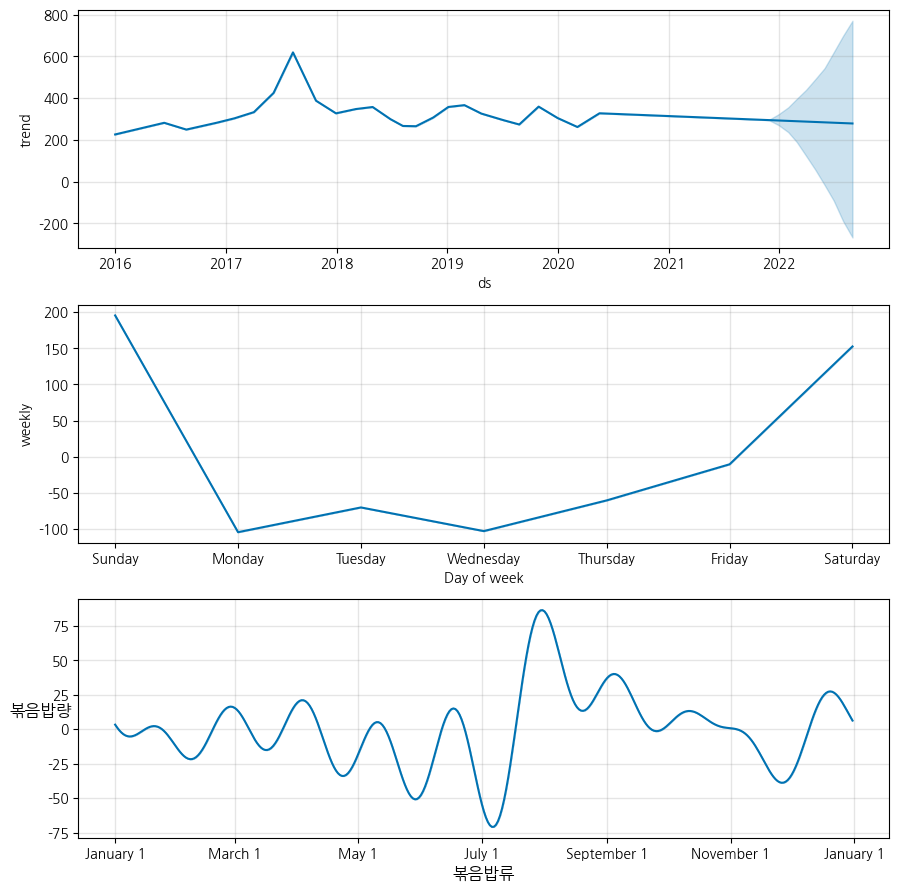

In [38]:
m = Prophet()
m.fit(df_cook_s) #allitem자리에 생성하신 데이터 프레임을 넣어주세요



a_data = m.make_future_dataframe(periods = 10, freq = 'm')# (freq :'m'월, 'd' 일 기준) (periods: 기간)

############## 여기서부터 여러분이 수정하실 항목은 없습니다.####################
a = m.predict(a_data)
a[['ds','yhat','yhat_lower','yhat_upper']].tail()
m.plot_components(a)#figsize = (15,6)크기 조정할려면 이거 소괄호 안에 넣어유

plt.ylabel('볶음밥량',rotation = 0,size = 12)
plt.xlabel('볶음밥류',rotation = 0,size = 12)

################### 100만개 기준 약 3분안에 그려줌 ############################

In [39]:
df1 = pd.read_csv('/home/piai/바탕화면/간편식 데이터/정제완료된_booking_+_productname_추가한파일_csv')
df1.head()

,Unnamed: 0,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,납기지연여부,ym,품목명,납기일-수주일
0,608060,C,20160908,246,IJ2120,400,1BA03023,720,720,2600.0,1872000.0,187200,Y,20190912,0,201609,갈릭라이스3kg,30004
1,303029,C,20161230,279,IJ9471,400,1BA03147,0,0,1705.0,1705.0,171,Y,20171231,0,201612,요리밥부드러운새우볶음밥250g,10001
2,303032,C,20161230,282,IJ9471,400,1BA03151,0,0,1841.0,1841.0,184,Y,20171231,0,201612,요리밥상하이필라프250g,10001
3,667395,C,20181230,289,IO976,400,13R11033,280,1,8400.0,4200.0,420,Y,20191231,0,201812,빠네스테이크소스T,10001
4,303031,C,20161230,281,IJ9471,400,1BA03149,0,0,1500.0,1500.0,150,Y,20171231,0,201612,기타,10001


In [40]:
df1 = pd.read_csv('/home/piai/바탕화면/간편식 데이터/정제완료된_booking_+_productname_추가한파일_csv')
df1.head()

,Unnamed: 0,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,납기지연여부,ym,품목명,납기일-수주일
0,608060,C,20160908,246,IJ2120,400,1BA03023,720,720,2600.0,1872000.0,187200,Y,20190912,0,201609,갈릭라이스3kg,30004
1,303029,C,20161230,279,IJ9471,400,1BA03147,0,0,1705.0,1705.0,171,Y,20171231,0,201612,요리밥부드러운새우볶음밥250g,10001
2,303032,C,20161230,282,IJ9471,400,1BA03151,0,0,1841.0,1841.0,184,Y,20171231,0,201612,요리밥상하이필라프250g,10001
3,667395,C,20181230,289,IO976,400,13R11033,280,1,8400.0,4200.0,420,Y,20191231,0,201812,빠네스테이크소스T,10001
4,303031,C,20161230,281,IJ9471,400,1BA03149,0,0,1500.0,1500.0,150,Y,20171231,0,201612,기타,10001


In [41]:
df_cook_mayo = df1[df1['품목명'].str.contains('마요네즈', case=False, regex=False)]
df_cook_mayo

,Unnamed: 0,수주사업장,수주일자,수주일련번호,거래처코드,수주부서,수주품목코드,출고수량KG,수주수량KG,수주단가,수주금액,부가세금액,출하완료여부,납기일자,납기지연여부,ym,품목명,납기일-수주일
46,152943,C,20161127,3,FJ0004,400,16B06036,13680,13680,2472.0,33816960.0,0,Y,20170109,0,201611,JFC마요네즈1kg,8982
53,305938,C,20171208,281,FJ0004,400,16B06036,13100,12960,2230.0,28900800.0,0,Y,20180108,0,201712,JFC마요네즈1kg,8900
56,158752,C,20161223,94,FJ0004,400,16B06036,14400,14400,2472.0,35596800.0,0,Y,20170123,0,201612,JFC마요네즈1kg,8900
68,311135,C,20171229,74,IJ3123,400,16B06048,1272,1400,6160.0,3920000.0,392000,Y,20180119,1,201712,천년풍미퓨어마요네즈,8890
71,311136,C,20171229,73,IJ3123,400,16B06061,606,600,3300.0,1800000.0,180000,Y,20180119,0,201712,천년풍미퓨어마요네즈1kg,8890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962853,862208,C,20210111,901,IK0377,202,16B06101,4,4,5775.0,23100.0,2310,Y,20210111,0,202101,정성담은마요네즈(1kg),0
962958,861095,C,20210108,117,IJ9455,202,16B06095,256,256,1562.5,400000.0,12500,Y,20210108,0,202101,골드마요네즈3.2kg(캡파우치),0
962962,861099,C,20210108,121,IJ9455,202,16B03002,100,100,1600.0,160000.0,1600,Y,20210108,0,202101,마요네즈-업소용10kg,0
963015,398260,C,20180727,133,IK0377,200,16B06101,22,22,5775.0,127050.0,12705,Y,20180727,0,201807,정성담은마요네즈(1kg),0


In [42]:
df_cook_mayo = df_cook_mayo[['수주일자','수주수량KG']]

In [43]:
df_cook_mayo = df_cook_mayo[df_cook_mayo['수주수량KG'] > 0]

In [44]:
df_cook_mayo.rename(columns = {'수주일자':'ds','수주수량KG':'y'}, inplace = True)
df_cook_mayo 
df_cook_mayo['ds'] = pd.to_datetime(df_cook_mayo['ds'] , format = "%Y%m%d")
df_cook_mayo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39270 entries, 46 to 963122
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      39270 non-null  datetime64[ns]
 1   y       39270 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 920.4 KB


In [45]:
df_cook_mayo.sort_values(by ='ds',ascending=True)

,ds,y
345155,2016-01-01,1
816769,2016-01-02,109
816741,2016-01-02,180
146697,2016-01-02,18
344979,2016-01-03,129
...,...,...
345828,2021-11-03,300
345886,2021-11-09,648
345893,2021-11-16,648
345863,2021-11-23,648


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/piai/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.4675
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        133617   2.85984e-05       523.708           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        133617   0.000204049       343.627           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     273        133618   1.87372e-05       153.177           1           1      319   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/piai/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/piai/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/piai/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/piai/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.a

Text(0.5, 70.7222222222222, '마요네즈')

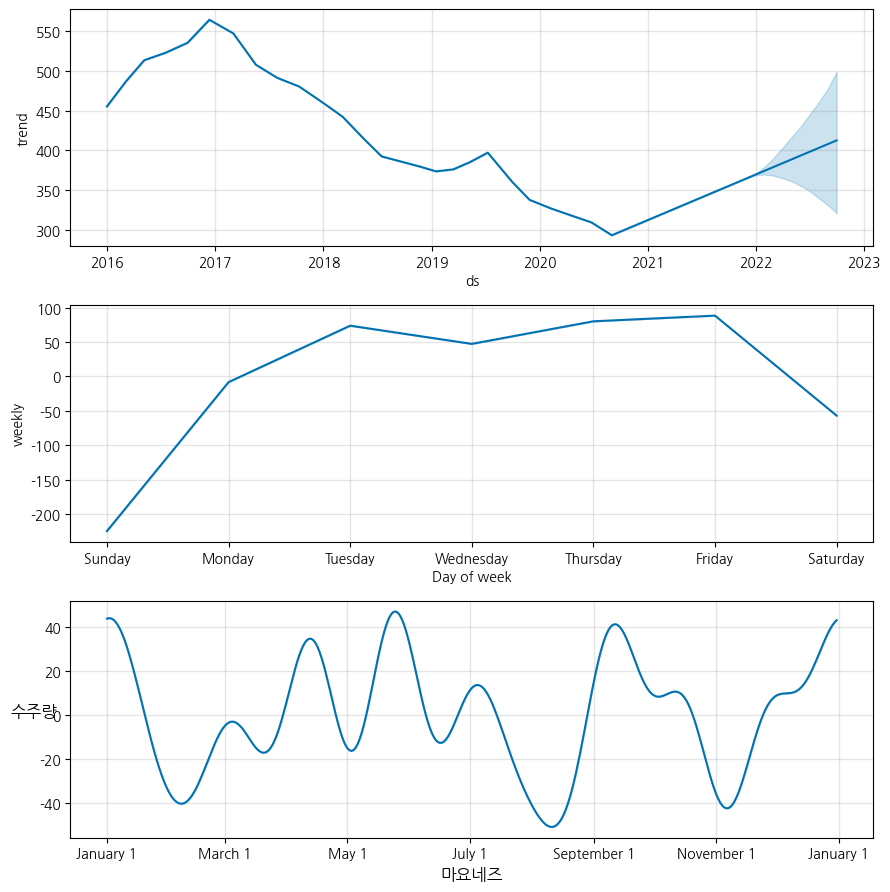

In [46]:
m = Prophet()
m.fit(df_cook_mayo) #allitem자리에 생성하신 데이터 프레임을 넣어주세요



a_data = m.make_future_dataframe(periods = 10, freq = 'm')# (freq :'m'월, 'd' 일 기준) (periods: 기간)

############## 여기서부터 여러분이 수정하실 항목은 없습니다.####################
a = m.predict(a_data)
a[['ds','yhat','yhat_lower','yhat_upper']].tail()
m.plot_components(a)#figsize = (15,6)크기 조정할려면 이거 소괄호 안에 넣어유

plt.ylabel('수주량',rotation = 0,size = 12)
plt.xlabel('마요네즈',rotation = 0,size = 12)

################### 100만개 기준 약 3분안에 그려줌 ############################